<a href="https://colab.research.google.com/github/INCREDIBLE-AURNOB/ML-models/blob/master/Unsupervised_Learning_and_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ref: https://jovian.com/learn/machine-learning-with-python-zero-to-gbms/lesson/unsupervised-learning-and-recommendations

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
iris_df=sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


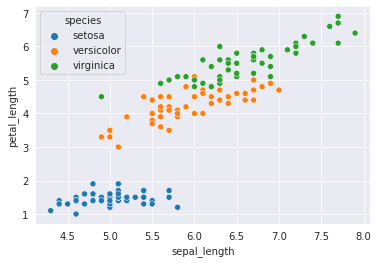

In [3]:
sns.scatterplot(data=iris_df,x='sepal_length',y='petal_length',hue='species')

In [4]:
numeric_cols=["sepal_length","sepal_width","petal_length","petal_width"]
X=iris_df[numeric_cols]

In [5]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=42)

In [6]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [7]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [8]:
preds=model.predict(X)

In [9]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

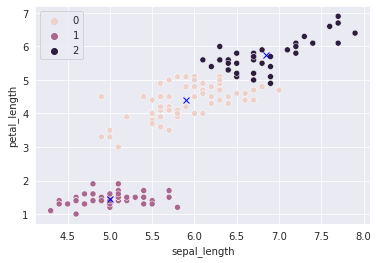

In [10]:
sns.scatterplot(data=X,x='sepal_length',y='petal_length',hue=preds)
centers_x,centers_y=model.cluster_centers_[:,0],model.cluster_centers_[:,2]
plt.plot(centers_x,centers_y,'xb')

In [11]:
model.inertia_

78.851441426146

#### Lets find the better cluster number from "No. of clusters" vs "Inertia"

Text(0, 0.5, 'Inertia')

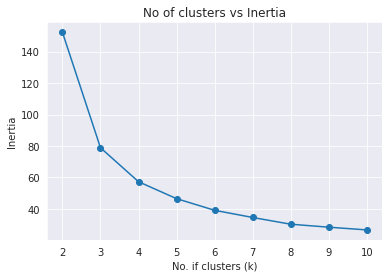

In [12]:
options=range(2,11)
inertias=[]
for n_clusters in options:
  model=KMeans(n_clusters,random_state=42).fit(X)
  inertias.append(model.inertia_)

plt.title("No of clusters vs Inertia")
plt.plot(options,inertias,'-o')
plt.xlabel('No. if clusters (k)')
plt.ylabel('Inertia')

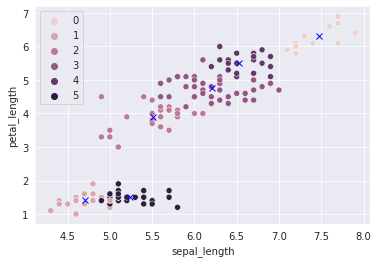

In [13]:
# Finding 6 clusters fitted well
model=KMeans(n_clusters=6,random_state=42).fit(X)
preds=model.predict(X)
sns.scatterplot(data=X,x='sepal_length',y='petal_length',hue=preds)
centers_x,centers_y=model.cluster_centers_[:,0],model.cluster_centers_[:,2]
plt.plot(centers_x,centers_y,'xb')

## DBSCAN

In [14]:
from sklearn.cluster import DBSCAN

In [18]:
model=DBSCAN(eps=1.1,min_samples=4)

In [19]:
model.fit(X)

DBSCAN(eps=1.1, min_samples=4)

In [20]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

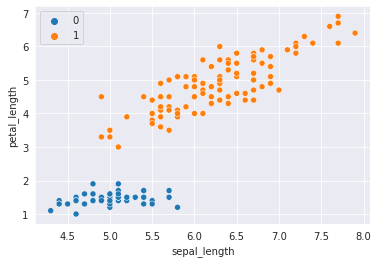

In [21]:
sns.scatterplot(data=X,x='sepal_length',y='petal_length',hue=model.labels_)

## Dimentionality Reduction and Manifold Learning

### Principle Component Analysis(PCA)

In [22]:
iris_df=sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca=PCA(n_components=2)

In [26]:
pca.fit(iris_df[numeric_cols])

PCA(n_components=2)

In [27]:
pca

PCA(n_components=2)

In [28]:
transformed=pca.transform(iris_df[numeric_cols])

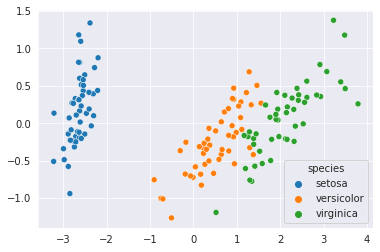

In [31]:
sns.scatterplot(x=transformed[:,0],y=transformed[:,1],hue=iris_df['species'])

In [32]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)

In [33]:
transformed=tsne.fit_transform(iris_df[numeric_cols])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


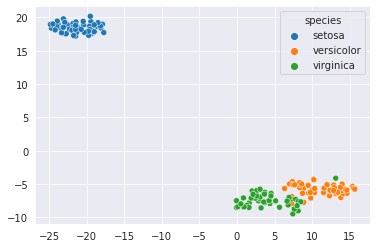

In [34]:
sns.scatterplot(x=transformed[:,0],y=transformed[:,1],hue=iris_df['species'])